# 1. Linear Regression with Gradient Descend

In [ ]:
# Import helpers!
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats #New library: useful for getting numerous scientific operations

In [ ]:
x = np.arange(0, 100, 1).reshape(-1, 1)
y = 10*x + 10
err = stats.norm.rvs(size=x.shape, scale=50, random_state=13) #Sample random variables from normal distribution with std=50 and mean=0
y = y + err
x1 = np.ones((x.shape[0],1)) # Creatng rows of 1's of same size as x 
X = np.append(x1,x, axis=1)  # Redefine X for training linear regression model  


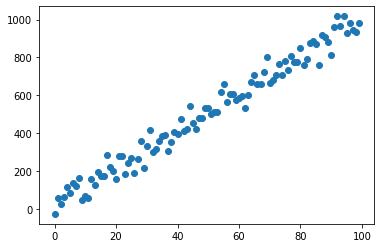

In [ ]:
plt.scatter(x, y)

In [ ]:
print ("shape x:", x.shape)
print ("shape y:", y.shape)
print ("shape X:", X.shape)

shape x: (100, 1)
shape y: (100, 1)
shape X: (100, 2)


## Recall gradient descend algorithm
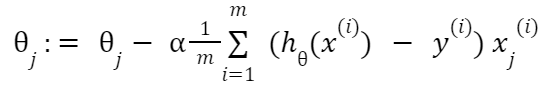

### How would you rewrite this in matrix form?

In [ ]:
def getLinearPrediction(X, theta):
  ''' Return H(x), output shape == x.shape
  '''
  h = np.dot(X,theta) 
  return h

def getLoss(X, y, theta):
  ''' Return SSD loss function. Must be a float value
  '''
  m = X.shape[0]
  loss = (1/(2*m))*np.sum(np.square(getLinearPrediction(X, theta) -y))
  
  return loss

def getLossGradient(X, y, theta):
  ''' Return gradient of loss function. Shape of output must be equal to shape of theta!
  '''
  m = X.shape[0]
  gradient = (1/m)* (X.T.dot(getLinearPrediction(X, theta)-y))
  return gradient
  

def linearRegression(X, y, alpha=0.01, num_iterations=100):
  # Initialize theta! 
  theta = np.zeros((2, 1))

  # Save all losses in a list!
  losses = []

  for i in range(num_iterations):
    loss = getLoss(X, y, theta)
    losses.append(loss)

    # Get gradient!
    gradient = getLossGradient(X, y, theta) 
    
    # Upgrade theta!
    theta = theta - alpha * gradient
    
  return {
      'losses': losses,
      'theta': theta,
  }

alpha = 0.0001
num_iterations = 200

output = linearRegression(X, y, alpha=alpha, num_iterations=num_iterations)


[[ 0.26957896]
 [10.13798635]]


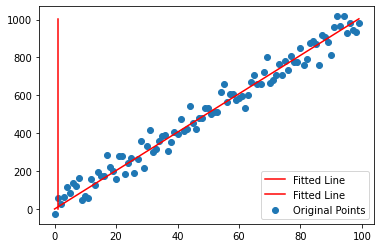

In [ ]:
# Plot prediction!
theta = output.get('theta', np.zeros((2, 1)))
print(theta)
plt.scatter(x, y, label='Original Points')
plt.plot(X, getLinearPrediction(X, theta), label='Fitted Line', color='r')
plt.legend()

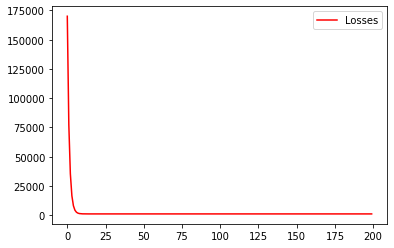

In [ ]:
# Plot losses!
losses = output.get('losses', [])
plt.plot(losses, label='Losses', color='r')
plt.legend()

In [ ]:
# A way to check for convergence is to look at how much your losses are reducing per-iteration and stopping the descent if your losses aren't improving anymore.

# Rewrite linearRegression function to stop the descend if absolute delta of loss between 2 consecutive iteration is less than input tolerance. 
# i.e. Break from loop if |loss(i+1) - loss(i)| <= tolerance, where i is iteration index

def linearRegression2(X, y, alpha=0.01, num_iterations=100, tolerance=0.005):
  # Initialize theta! 
  theta = np.zeros((2, 1))

  # Save all losses in a list!
  losses = []
  current_loss=1
  deviation=1
  iteration=0
  while deviation > tolerance and iteration < num_iterations:
      
      previous_loss = current_loss
      
      loss = getLoss(X, y, theta)
      
      current_loss = loss
      
      losses.append(loss)
      
      # Deviation from tolerance value
      deviation=abs(current_loss-previous_loss) 
      
      # Get gradient!
      gradient = getLossGradient(X, y, theta)
      
      # Upgrade theta!
      theta = theta - alpha * gradient 
      
      # Update iterations value   
      iteration += 1

  return {
      'losses': losses,
      'theta': theta,
  }

alpha = 0.0001
num_iterations = 200
tolerance = 0.005

output = linearRegression2(X, y, alpha=alpha, num_iterations=num_iterations, tolerance=tolerance)


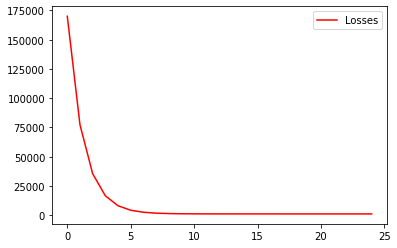

In [ ]:
# Plot losses!
losses= output.get('losses', [])
plt.plot(losses, label='Losses', color='r')
plt.legend()

### Q) What happends to the gradient descend when the learning rate is increased to 0.001? What about when its lowered to 0.00001? 

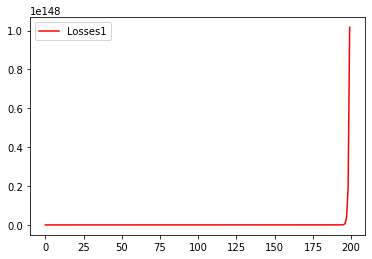

In [ ]:
# When alpha = 0.001 
num_iterations = 200
tolerance = 0.005
alpha1 = 0.001
output = linearRegression2(X, y, alpha=alpha1, num_iterations=num_iterations, tolerance=tolerance)
losses= output.get('losses', [])
plt.plot(losses, label='Losses1', color='r')
plt.legend()


[170007.37740194934, 159097.15907000066, 148891.80953718684, 139345.78983953275, 130416.50311695895, 122064.10453483959, 114251.32348582461, 106943.29727854427, 100107.4155710708, 93713.17485495814, 87732.04234052941, 82137.32863603203, 76904.06865252127, 72008.91020303853, 67430.00979898436, 63146.935178702086, 59140.57413332866, 55393.04922307017, 51887.63800334273, 48608.698404807394, 45541.59893432462, 42672.65338536681, 39989.05976654934, 37478.84317576321, 35130.80236499848, 32934.459757416655, 30880.014693635112, 28958.299698595834, 27160.739573870072, 25479.313132857696, 23906.51740813361, 22435.33417122517, 21059.19861542271, 19771.970061877804, 18567.90455827219, 17441.629247785073, 16388.118393986773, 15402.670954675066, 14480.889604583106, 13618.661113352391, 12812.137991212405, 12057.721320464872, 11352.044696162264, 10691.959204319674, 10074.519370628732, 9496.970016973226, 8956.733967096448, 8451.400546560008, 7978.714825677634, 7536.56755742327, 7122.985765413621, 6736.

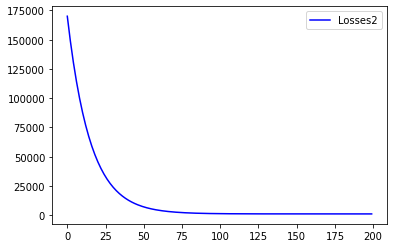

In [ ]:
# When alpha = 0.00001
num_iterations = 200
tolerance = 0.005
alpha2 = 0.00001
output = linearRegression2(X, y, alpha=alpha2, num_iterations=num_iterations, tolerance=tolerance)
losses= output.get('losses', [])
print(losses)
plt.plot(losses, label='Losses2', color='b')
plt.legend()

When alpha is incresed, then step size increses due to which curve tries to reach end position quickly. This results into diverging nature of curve as shown above in 'Losses1'.

When alpha is decreased, then step size decreases due to which curve tries to reach end position slowly. This results into more converging nature of curve as shown above in 'Losses2'.

#2.  Direct Solution: Obtain closed form solution [Recall: Normal equation]


Normal Equation : $\theta=(X^T X)^{-1} X^Ty$ 

In [ ]:
def getActualTheta(X, y):
  ''' Return actual theta of shape (2, 1)
  '''
# Using Normal Equation. 
  thetaReal = np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))
  return thetaReal
thetaReal = getActualTheta(X, y)
print(thetaReal)

[[23.21088712]
 [ 9.79211076]]


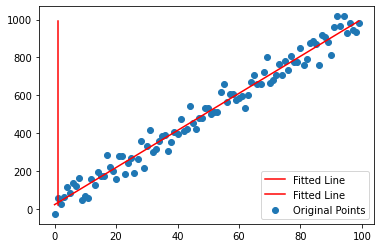

In [ ]:
# Plot real solution
plt.scatter(x, y, label='Original Points')
plt.plot(X, getLinearPrediction(X, thetaReal), label='Fitted Line', color='r')
plt.legend()

1067.557945369891
[170007.37740194934, 164506.73064904212, 159185.2553903706, 154037.1155076042, 149056.66498116258, 144238.4416981662, 139577.16146207892, 135067.71219747356, 130705.14834356429, 126484.68543035744, 122401.69483147262, 118451.69868787871, 114630.36499697834, 110933.50286165456, 107357.05789406924, 103897.10776917309, 100549.85792304989, 97311.63739137776, 94178.89478344381, 91148.19438729601, 88216.21240176128, 85379.73329119764, 82635.64625898178, 79980.94183586554, 77412.70857945879, 74928.12988121975, 72524.48087745042, 70199.12546090942, 67949.51338976536, 65773.17749071935, 63667.73095322985, 61630.86471187219, 59660.34491396187, 57754.01046966469, 55909.770681906375, 54125.60295348301, 52399.55056885713, 50729.720548206926, 49114.28157137514, 47551.46196944091, 46039.54778171143, 44576.8808760031, 43161.85713015038, 41792.924672747904, 40468.58218119654, 39187.377235187065, 37947.904723815256, 36748.80530458184, 35588.763912587114, 34466.50831828531, 33380.807732

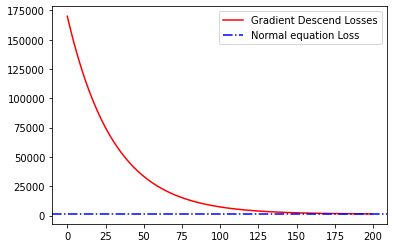

In [ ]:
# How close are we to the closed form solution?
lossReal = getLoss(X, y, thetaReal)
print(lossReal)
output = linearRegression(X, y, alpha=0.000005, num_iterations=200)
losses = output.get('losses',[])
print(losses)
plt.plot(losses, label='Gradient Descend Losses', color='r')
plt.axhline(lossReal, label='Normal equation Loss', color='b', ls='-.')
plt.legend()

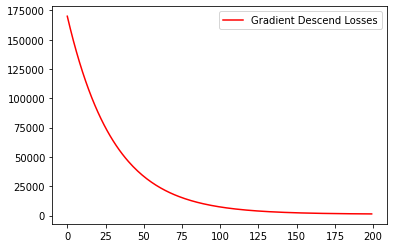

In [ ]:
# Plotting Gradient Descend loss
plt.plot(losses, label='Gradient Descend Losses', color='r')
plt.legend()

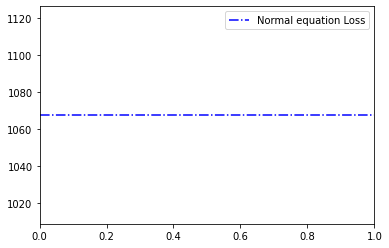

In [ ]:
# Plotting Normal Equation loss
plt.axhline(lossReal, label='Normal equation Loss', color='b', ls='-.')
plt.legend()